In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\91998\\AI_Genie_Capstone\\ML_Project'

In [3]:
os.chdir("D:\\Narendra\\AIGenie_Capstone_ALL")

In [4]:
os.listdir()

['AIGenie_Capstone_ALL.pptx',
 'dask-worker-space',
 'movie_metadata.csv',
 'sms.csv',
 'soccerball',
 'soccerball.zip']

In [5]:
import pandas as pd
movie_metadata = pd.read_csv('movie_metadata.csv')

In [6]:
#Taken from Kaggle Kernels
def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in df.columns:
        if df[col].dtype != object and df[col].dtype != 'datetime64':  # Exclude strings and Datetimes           
            # Print current column type
            #print("******************************")
            #print("Column: ",col)
            #print("dtype before: ",df[col].dtype)            
            # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            #print("min for this col: ",mn)
            #print("max for this col: ",mx)
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                NAlist.append(col)
                df[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    
            # Make float datatypes 32 bit
            else: 
                df[col] = df[col].astype(np.float32)
            
            # Print new column type
            #print("dtype after: ",df[col].dtype)
            #print("******************************")
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",(100*mem_usg)/start_mem_usg,"% of the initial size")
    return df, NAlist

movie_metadata, NAlist = reduce_mem_usage(movie_metadata)

Memory usage of properties dataframe is : 1.077423095703125  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  0.7167196273803711  MB
This is  66.52165061606004 % of the initial size


In [7]:
movie_metadata.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,NaN,Doug Walker,0,6,131,65535,Rob Walker,131,161,Documentary,...,0,NaN,NaN,NaN,217,1915,12,7.1,0.18,0


In [8]:
movie_metadata.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000
mean,138.804283,106.900059,2023.856633,940.958556,5.968235e+06,3.997229e+07,8.366816e+04,9699.063851,2.024985,271.634940,3.587434e+07,2000.597264,1.107335e+07,6.442137,2.087290,7525.964505
std,121.792053,25.756563,9628.336852,4677.610237,1.599209e+08,6.483777e+07,1.384853e+05,18163.799124,13.018256,377.603767,1.961555e+08,17.682179,2.178058e+08,1.125116,1.430834,19320.445110
min,0.000000,6.000000,0.000000,0.000000,0.000000e+00,1.610000e+02,5.000000e+00,0.000000,0.000000,0.000000,2.170000e+02,1915.000000,0.000000e+00,1.600000,0.180000,0.000000
25%,48.000000,93.000000,7.000000,134.500000,6.155000e+02,3.037815e+05,8.593500e+03,1411.000000,0.000000,64.000000,3.000000e+06,1998.000000,2.810000e+02,5.800000,1.850000,0.000000
50%,109.000000,103.000000,52.000000,374.000000,9.890000e+02,1.527968e+07,3.435900e+04,3090.000000,1.000000,155.000000,1.500000e+07,2005.000000,5.960000e+02,6.600000,1.850000,166.000000
75%,194.000000,118.000000,218.000000,638.000000,1.100000e+04,5.135707e+07,9.630900e+04,13756.500000,2.000000,324.000000,4.000000e+07,2011.000000,9.190000e+02,7.200000,2.350000,3000.000000
max,813.000000,511.000000,65535.000000,65535.000000,4.294967e+09,7.605058e+08,1.689764e+06,656730.000000,255.000000,5060.000000,1.221550e+10,2016.000000,4.294967e+09,9.500000,16.000000,349000.000000


In [9]:
movie_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       5043 non-null uint16
duration                     5043 non-null uint16
director_facebook_likes      5043 non-null uint16
actor_3_facebook_likes       5043 non-null uint16
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5043 non-null uint32
gross                        5043 non-null uint32
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null uint32
cast_total_facebook_likes    5043 non-null uint32
actor_3_name                 5020 non-null object
facenumber_in_poster         5043 non-null uint8
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-null o

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168CEB66488>,
      dtype=object)

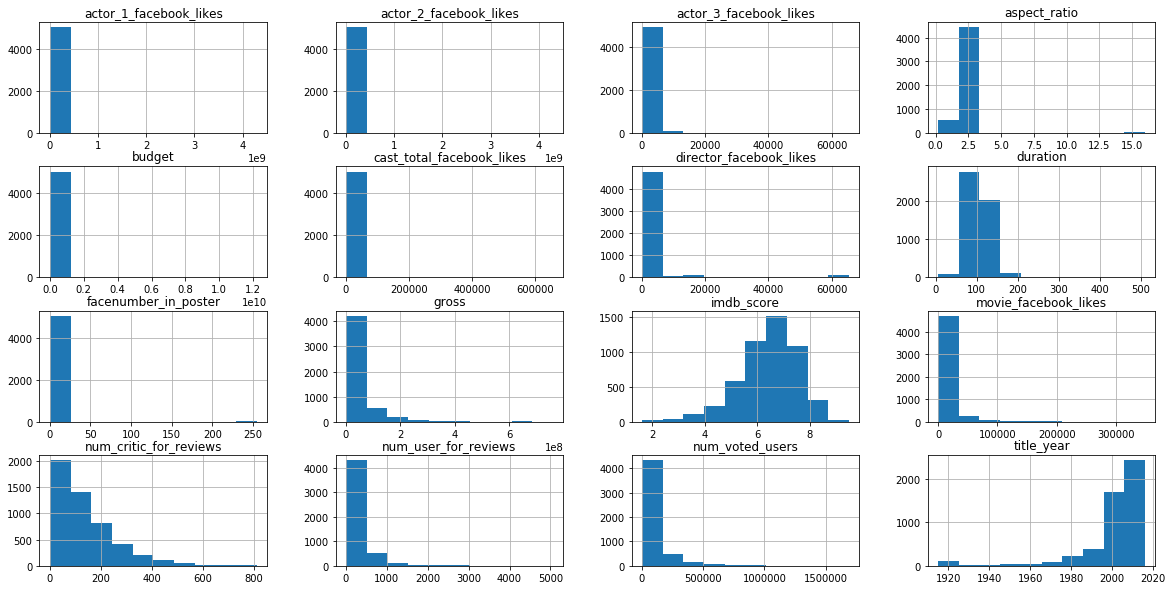

In [10]:
movie_metadata.hist(figsize = (20,10))

In [11]:
feature_correlation = movie_metadata.corr()
feature_correlation.style.background_gradient(cmap='coolwarm')

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1,0.269492,-0.0805777,0.0515122,-0.0391088,0.524832,0.626616,0.26611,-0.0124656,0.611972,0.12785,0.286635,-0.0429432,0.299677,0.0474007,0.682606
duration,0.269492,1,-0.203906,-0.0293922,-0.0209412,0.254994,0.31428,0.123294,-0.00492272,0.330178,0.0748677,0.106073,-0.053857,0.256943,-0.0233266,0.196002
director_facebook_likes,-0.0805777,-0.203906,1,0.046894,-0.00774601,-0.0431442,0.0319425,-0.0167552,-0.00850872,-0.00326775,-0.0181098,-0.685137,0.0426533,0.185011,0.377654,0.0253353
actor_3_facebook_likes,0.0515122,-0.0293922,0.046894,1,0.514901,0.0802737,0.0686233,0.136771,-0.00624086,0.0484415,0.00917021,-0.0306225,0.702104,0.0390132,-0.00301752,0.0784343
actor_1_facebook_likes,-0.0391088,-0.0209412,-0.00774601,0.514901,1,-0.0229472,-0.0224531,-0.0198207,-0.00498168,-0.0262445,-0.00675268,0.0162217,0.733361,0.0123401,-0.0277382,-0.0129701
gross,0.524832,0.254994,-0.0431442,0.0802737,-0.0229472,1,0.651528,0.25975,0.0030394,0.58293,0.123506,0.10822,-0.0309418,0.176445,0.0212421,0.392634
num_voted_users,0.626616,0.31428,0.0319425,0.0686233,-0.0224531,0.651528,1,0.265911,-0.0105384,0.79875,0.087479,0.0469788,-0.0285081,0.410965,0.0409604,0.537924
cast_total_facebook_likes,0.26611,0.123294,-0.0167552,0.136771,-0.0198207,0.25975,0.265911,1,-0.000382024,0.208008,0.0418381,0.116203,-0.0271145,0.0857873,0.00837257,0.209786
facenumber_in_poster,-0.0124656,-0.00492272,-0.00850872,-0.00624086,-0.00498168,0.0030394,-0.0105384,-0.000382024,1,-0.0215855,-0.00485538,0.0422969,-0.00730782,-0.0267,0.0322343,0.0307988
num_user_for_reviews,0.611972,0.330178,-0.00326775,0.0484415,-0.0262445,0.58293,0.79875,0.208008,-0.0215855,1,0.0930373,0.0488711,-0.0319201,0.28978,0.0398189,0.401199


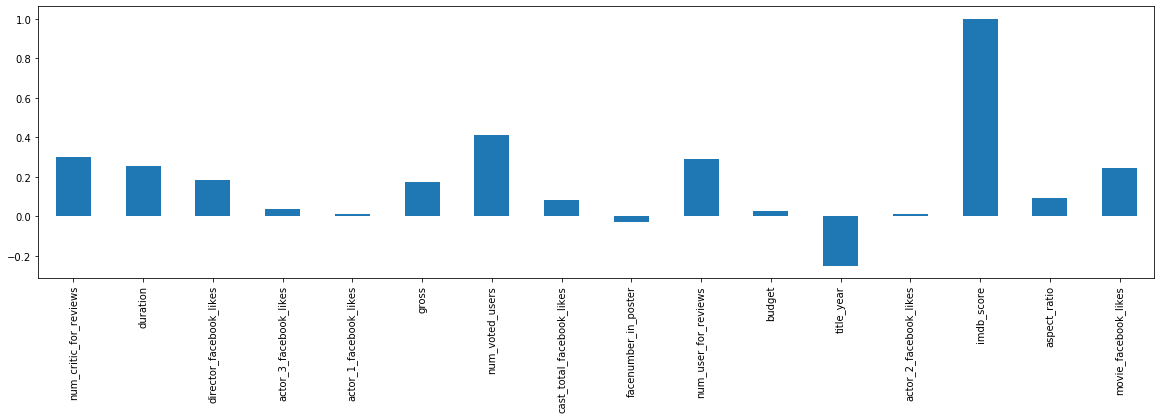

In [12]:
feature_correlation['imdb_score'].plot(kind='bar', figsize = (20,5))

In [13]:
movie_metadata.columns, len(movie_metadata.columns)

(Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
        'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
        'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
        'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
        'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
        'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
        'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
        'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
       dtype='object'), 28)

In [14]:
movie_metadata.dtypes

color                         object
director_name                 object
num_critic_for_reviews        uint16
duration                      uint16
director_facebook_likes       uint16
actor_3_facebook_likes        uint16
actor_2_name                  object
actor_1_facebook_likes        uint32
gross                         uint32
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users               uint32
cast_total_facebook_likes     uint32
actor_3_name                  object
facenumber_in_poster           uint8
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews          uint16
language                      object
country                       object
content_rating                object
budget                        uint64
title_year                    uint16
actor_2_facebook_likes        uint32
imdb_score                   float32
aspect_ratio                 float32
m

In [15]:
numeric_features = movie_metadata.columns[movie_metadata.dtypes!='object']
numeric_features

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [16]:
dataset_shape = movie_metadata.shape
dataset_shape

(5043, 28)

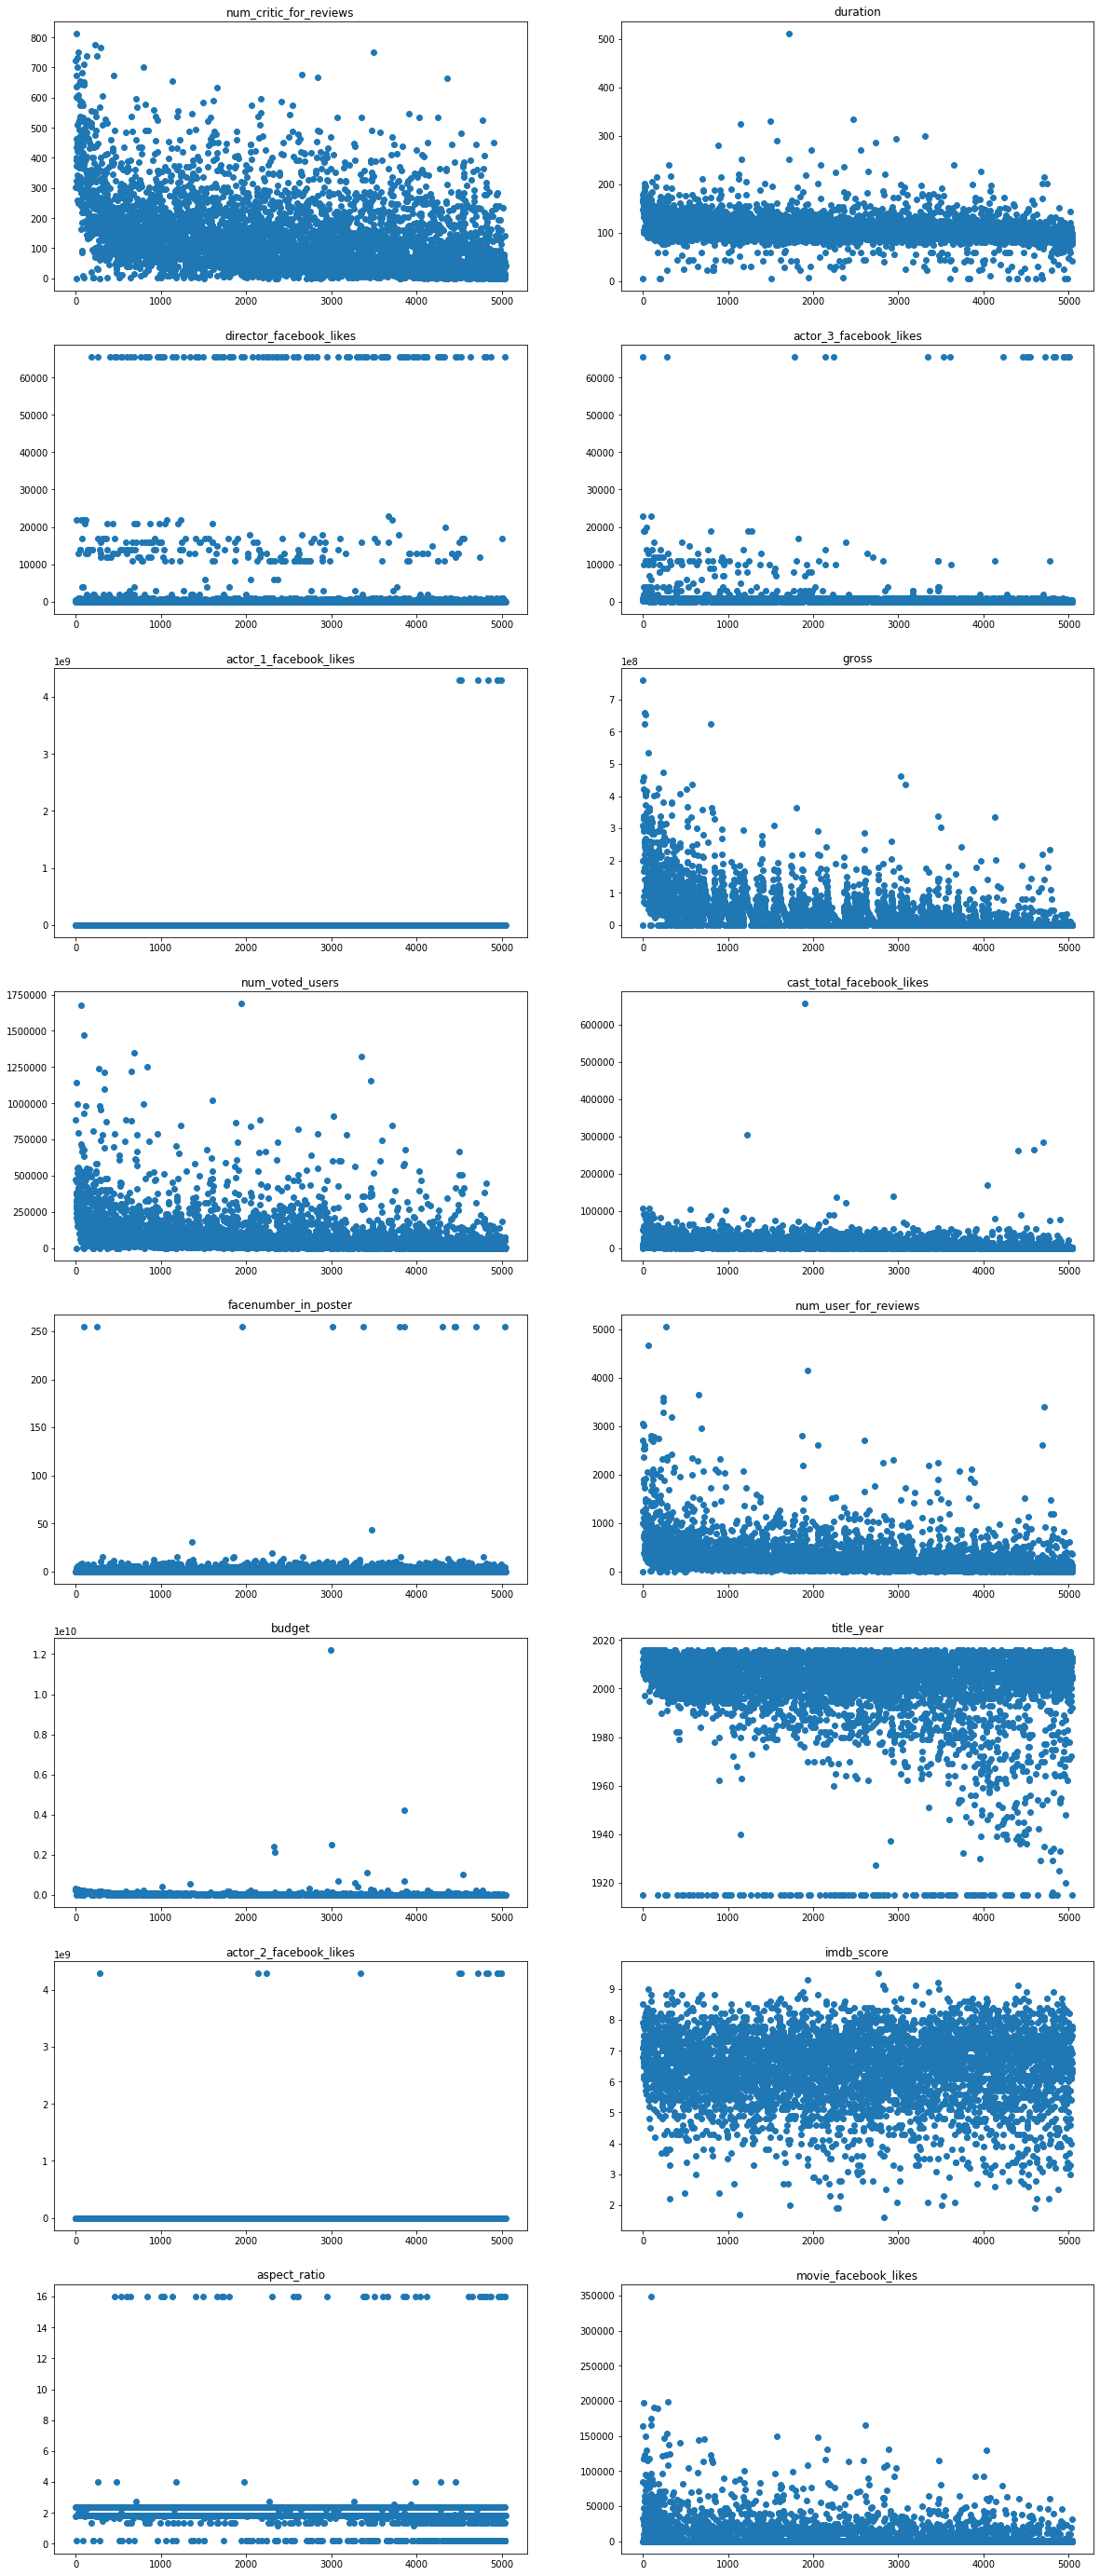

In [17]:
fig, ax = plt.subplots(len(numeric_features)//2, 2, figsize = (20,50))
for i in range(len(ax)):
    for j in range(len(ax[0])):
        #print(i, j, 2*i+j)
        ax[i][j].scatter(range(dataset_shape[0]), movie_metadata[numeric_features[2*i+j]])
        ax[i][j].title.set_text(numeric_features[2*i+j])

In [18]:
categorical_features = [feature for feature in movie_metadata.columns if feature not in numeric_features]
categorical_features

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating']

In [19]:
movie_metadata[categorical_features].nunique()

color                 2
director_name      2398
actor_2_name       3032
genres              914
actor_1_name       2097
movie_title        4917
actor_3_name       3521
plot_keywords      4760
movie_imdb_link    4919
language             47
country              65
content_rating       18
dtype: int64

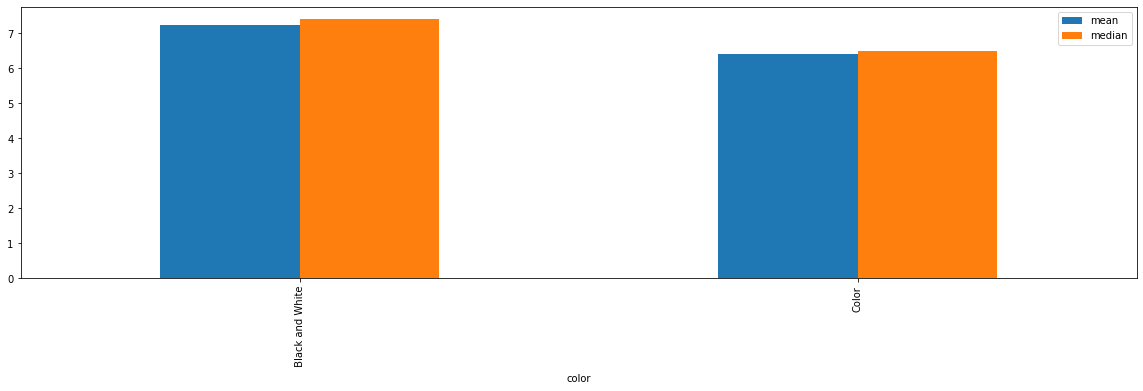

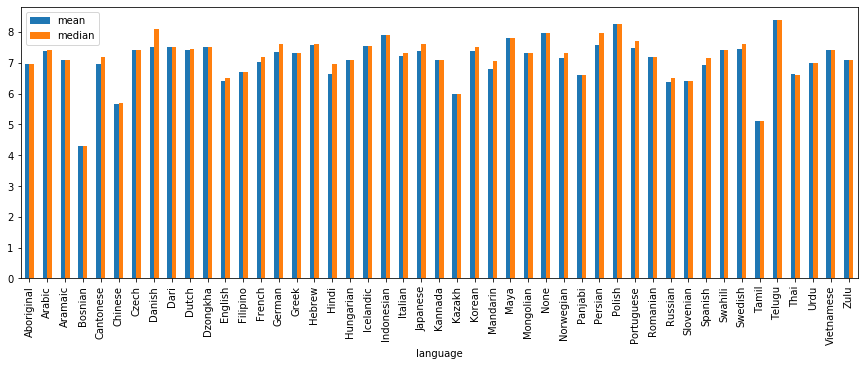

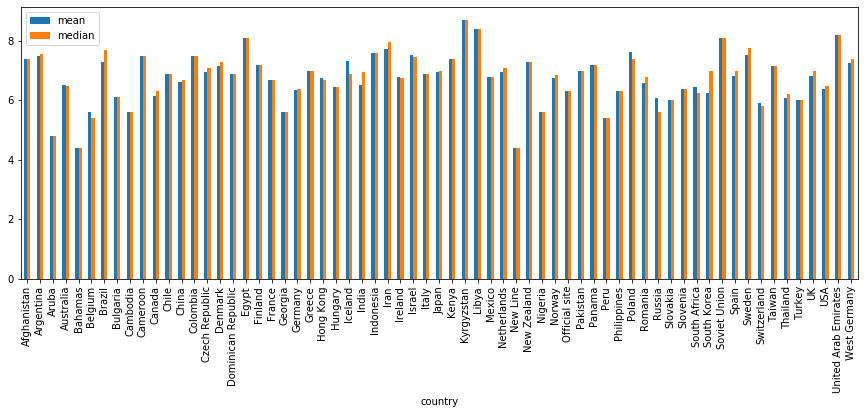

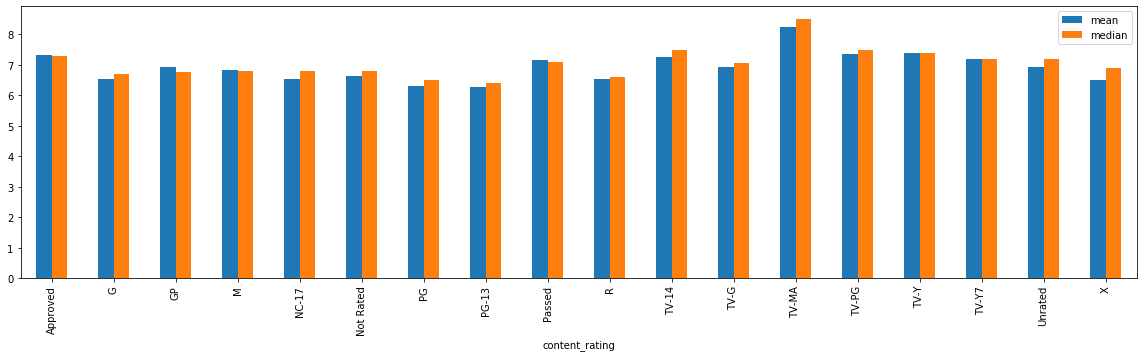

In [20]:
movie_metadata.groupby('color')['imdb_score'].agg(['mean', 'median']).plot(kind = 'bar', figsize = (20,5))
movie_metadata.groupby('language')['imdb_score'].agg(['mean', 'median']).plot(kind = 'bar', figsize = (15,5))
movie_metadata.groupby('country')['imdb_score'].agg(['mean', 'median']).plot(kind = 'bar', figsize = (15,5))
movie_metadata.groupby('content_rating')['imdb_score'].agg(['mean', 'median']).plot(kind = 'bar', figsize = (20,5))

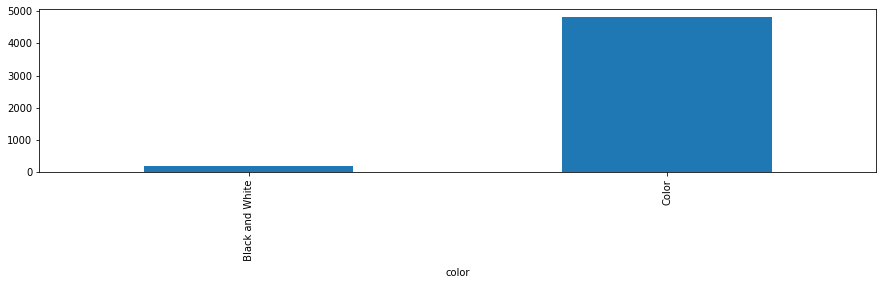

In [21]:
movie_metadata.groupby('color')['imdb_score'].count().plot(kind = 'bar', figsize = (15,3)) 

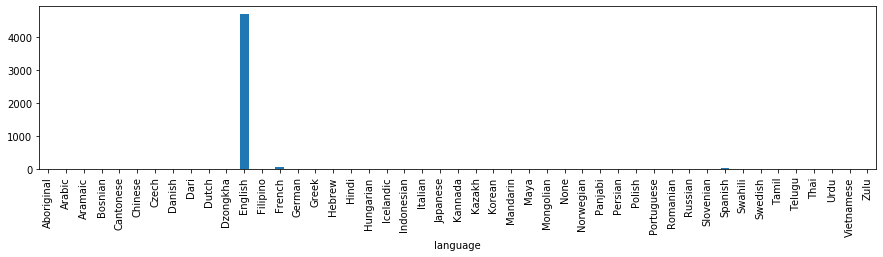

In [22]:
movie_metadata.groupby('language')['imdb_score'].count().plot(kind = 'bar', figsize = (15,3))

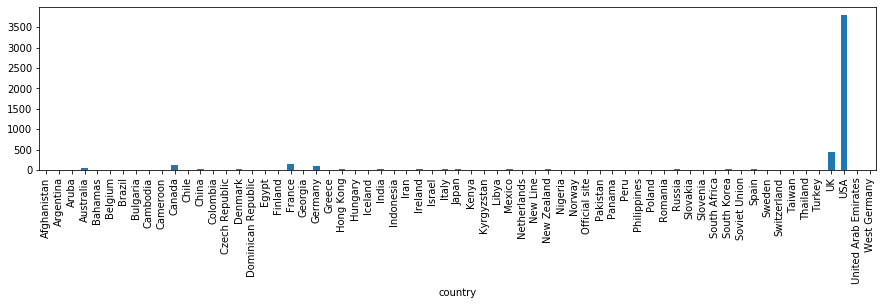

In [23]:
movie_metadata.groupby('country')['imdb_score'].count().plot(kind = 'bar', figsize = (15,3))

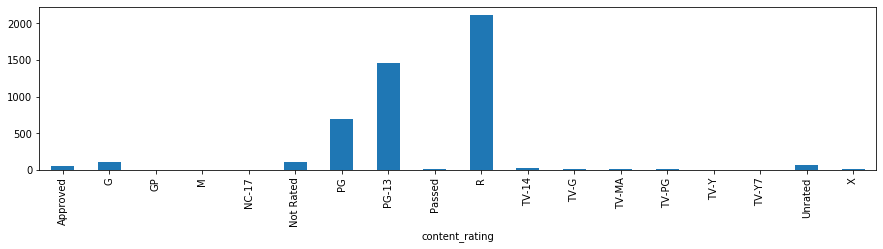

In [24]:
 movie_metadata.groupby('content_rating')['imdb_score'].count().plot(kind = 'bar', figsize = (15,3)) 